In [1]:
import pandas as pd

In [2]:
df_nil=pd.read_csv("advance_tax_nil_filers.csv")
df_nil.head()

,pin_no,tax_payer_name,tax_payer_type,department,station_name,division,obligation_name,year,transaction_type,amount,is_nil_return,estimate
0,A001731914G,BONIFACE WAMBUA KIOKO,INDI,MST,Machakos,compliance,Advance Tax,2022,Payment,146160,Y,13154.4
1,A005047400E,VICTOR GLEN KIPLANGAT,INDI,MST,KERICHO,compliance,Advance Tax,2016,Payment,70560,Y,6350.4
2,P051341658Z,Fountain Construction Company Limited,NONINDI,MST,East of Nairobi,compliance,Advance Tax,2023,Payment,168000,Y,15120.0
3,A005053844L,Mary Wambui Kamau,INDI,MST,Mombasa North,compliance,Advance Tax,2015,Payment,4500,Y,405.0
4,A005089080A,JOSPHAT WANJOHI MUHIA,INDI,MST,East of Nairobi,compliance,Advance Tax,2018,Payment,14400,Y,1296.0


In [3]:
df_nil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163132 entries, 0 to 163131
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pin_no            163132 non-null  object 
 1   tax_payer_name    163132 non-null  object 
 2   tax_payer_type    163132 non-null  object 
 3   department        163132 non-null  object 
 4   station_name      163132 non-null  object 
 5   division          163132 non-null  object 
 6   obligation_name   163132 non-null  object 
 7   year              163132 non-null  int64  
 8   transaction_type  163132 non-null  object 
 9   amount            163132 non-null  int64  
 10  is_nil_return     163132 non-null  object 
 11  estimate          163132 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 14.9+ MB


In [4]:
df_filtered = df_nil[(df_nil['year'] >= 2019) & (df_nil['year'] <= 2024)]
df_filtered.head()

,pin_no,tax_payer_name,tax_payer_type,department,station_name,division,obligation_name,year,transaction_type,amount,is_nil_return,estimate
0,A001731914G,BONIFACE WAMBUA KIOKO,INDI,MST,Machakos,compliance,Advance Tax,2022,Payment,146160,Y,13154.4
2,P051341658Z,Fountain Construction Company Limited,NONINDI,MST,East of Nairobi,compliance,Advance Tax,2023,Payment,168000,Y,15120.0
5,P051373230R,ATHI HARDWARE AND ELECTRICALS LIMITED,NONINDI,MST,East of Nairobi,compliance,Advance Tax,2019,Payment,3300,Y,297.0
12,A002140673F,VINCENT MAKOKHA WAMALWA,INDI,MST,BUNGOMA,compliance,Advance Tax,2020,Payment,18000,Y,1350.0
14,A002834940X,TABITHA AUMA OBONYO,INDI,MST,Mombasa South,compliance,Advance Tax,2021,Payment,20160,Y,1814.4


In [5]:
# Aggregate totals correctly
totals = df_filtered[['amount', 'estimate']].sum().reset_index()

# Rename columns for clarity
totals.columns = ['metric', 'total']

# Step 3: Format numbers with commas (apply to the 'total' column only)
totals['total'] = totals['total'].apply(lambda x: f"{x:,.0f}")

print(totals)


     metric          total
0    amount  3,098,288,749
1  estimate    272,229,967


In [6]:
df_non=pd.read_csv("advance_tax_non_filers.csv")
df_non.head()

,pin_no,tax_payer_name,tax_payer_type,department,station_name,obligation_name,division,from_date,to_date,transaction_type,amount,estimate
0,A004278214N,Raphael Njenga Ichugu,INDI,MST,Thika,Advance Tax,compliance,2024-12-31 21:00:00+00:00,2025-12-30 21:00:00+00:00,Payment,5000,450.00
1,A009065776F,Catherine Nkatha Karachi,INDI,MST,West of Nairobi,Advance Tax,compliance,2015-12-31 21:00:00+00:00,2016-12-30 21:00:00+00:00,Payment,5760,518.40
2,A005016031C,PAUL NJIRI MBIYU,INDI,MST,Thika,Advance Tax,compliance,2015-12-31 21:00:00+00:00,2016-12-30 21:00:00+00:00,Payment,8101,729.09
3,A005051649H,Gladys Nyaboke Nyangena,INDI,MST,Kisii,Advance Tax,compliance,2014-12-31 21:00:00+00:00,2015-12-30 21:00:00+00:00,Payment,10080,907.20
4,A004448737D,Elijah Maina Chege,INDI,MST,East of Nairobi,Advance Tax,compliance,2014-12-31 21:00:00+00:00,2015-12-30 21:00:00+00:00,Payment,4500,405.00


In [7]:
df_non.drop(columns=["from_date", "transaction_type"], inplace=True)

In [8]:


# Ensure to_date is datetime
df_non["to_date"] = pd.to_datetime(df_non["to_date"], errors='coerce')

# Extract only the year and create new column 'year'
df_non['year'] = df_non['to_date'].dt.year

# Convert to integer (optional, dt.year already gives int)
df_non['year'] = df_non['year'].astype(int)

# Drop the original to_date column if you don’t need it
df_non = df_non.drop(columns=["to_date"])

df_non.head()


,pin_no,tax_payer_name,tax_payer_type,department,station_name,obligation_name,division,amount,estimate,year
0,A004278214N,Raphael Njenga Ichugu,INDI,MST,Thika,Advance Tax,compliance,5000,450.00,2025
1,A009065776F,Catherine Nkatha Karachi,INDI,MST,West of Nairobi,Advance Tax,compliance,5760,518.40,2016
2,A005016031C,PAUL NJIRI MBIYU,INDI,MST,Thika,Advance Tax,compliance,8101,729.09,2016
3,A005051649H,Gladys Nyaboke Nyangena,INDI,MST,Kisii,Advance Tax,compliance,10080,907.20,2015
4,A004448737D,Elijah Maina Chege,INDI,MST,East of Nairobi,Advance Tax,compliance,4500,405.00,2015


In [9]:
df_filtered2 = df_non[(df_non['year'] >= 2019) & (df_non['year'] <= 2024)]
df_filtered2.head()

,pin_no,tax_payer_name,tax_payer_type,department,station_name,obligation_name,division,amount,estimate,year
10,A004568908G,David Harrison Akwimbi,INDI,MST,North of Nairobi,Advance Tax,compliance,2400,216.0,2023
11,A003120843Y,JOSEPH GITHINJI RIMBITO,INDI,MST,East of Nairobi,Advance Tax,compliance,2400,216.0,2019
15,A006262345L,Alex Munyao Musembi,INDI,MST,Machakos,Advance Tax,compliance,2400,180.0,2020
25,A002679650K,FAHAD MSALAM ABDALLA TIMAMI,INDI,MST,Mombasa North,Advance Tax,compliance,2400,180.0,2020
27,A004278214N,Raphael Njenga Ichugu,INDI,MST,Thika,Advance Tax,compliance,2400,216.0,2023


In [ ]:
# Aggregate totals correctly
totals2 = df_filtered2[['amount', 'estimate']].sum().reset_index()

# Rename columns for clarity
totals2.columns = ['metric', 'total']

# Step 3: Format numbers with commas (apply to the 'total' column only)
totals2['total'] = totals2['total'].apply(lambda x: f"{x:,.0f}")

print(totals2)

In [10]:
df_filtered2["pin_no"].nunique()

4507

In [11]:
df_comp=pd.read_csv("advance_tax_payments.csv")

In [26]:
# Ensure to_date is datetime
df_comp["to_date"] = pd.to_datetime(df_comp["to_date"], errors='coerce')

# Extract only the year and create new column 'year'
df_comp['year'] = df_comp['to_date'].dt.year

# Convert to integer (optional, dt.year already gives int)
df_comp['year'] = df_comp['year'].astype(int)

# Drop the original to_date column if you don’t need it
df_comp = df_comp.drop(columns=["to_date", "from_date"])

df_comp.head()

,pin_no,tax_payer_name,tax_payer_type,station_name,obligation_name,transaction_type,amount,year
0,P051184008N,CHESTER HOTELS (K) LTD,NONINDI,NAKURU,Advance Tax,Payment,4140,2016
1,A002707311M,JAMES GITHINJI NDIRITU,INDI,Nyeri,Advance Tax,Payment,3000,2021
2,P051301431G,RAPRA LIMITED,NONINDI,East of Nairobi,Advance Tax,Payment,2925,2024
3,P051215248Z,PHARMA SHARE SUPPLIES LIMITED,NONINDI,North of Nairobi,Advance Tax,Payment,6225,2019
4,P051224232Z,Davec Electrical Enterprises Limited,NONINDI,NANYUKI,Advance Tax,Payment,5490,2015


In [27]:


# Group by year and sum the 'amount' column
annual_projections = (
    df_comp.groupby('year')
      .agg(total_collected=('amount', 'sum'))
      .reset_index()
      .sort_values('year')
)

# Optional: format numbers with commas for readability
annual_projections['total_collected'] = annual_projections['total_collected'].apply(lambda x: f"{x:,.0f}")

print(annual_projections)


    year total_collected
0   2013          13,275
1   2014     346,175,376
2   2015     783,710,196
3   2016   2,019,374,445
4   2017   1,474,894,646
5   2018   1,229,047,258
6   2019   1,211,329,644
7   2020   1,198,811,615
8   2021   1,372,878,258
9   2022   1,416,297,907
10  2023   1,383,285,027
11  2024   1,741,643,555
12  2025   1,616,418,284
13  2026      75,353,280


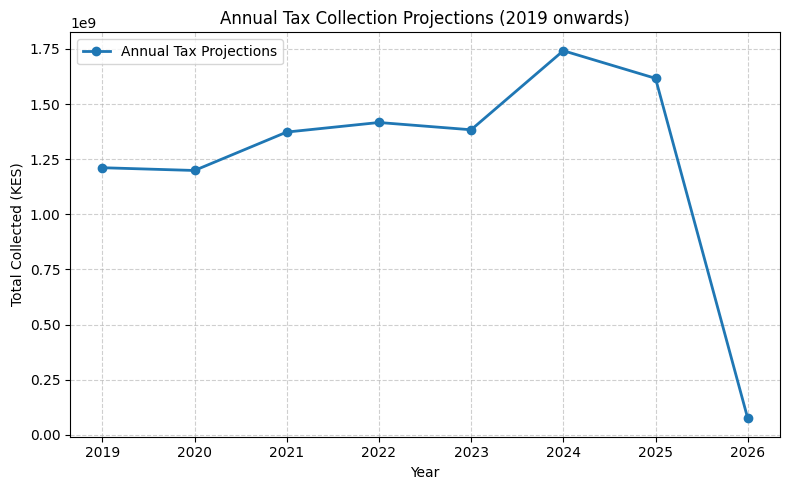

In [29]:
import matplotlib.pyplot as plt

# Group annual totals from 2019 onwards
annual_proj = (
    df_comp[df_comp['year'] >= 2019]
    .groupby('year')
    .agg(total_collected=('amount', 'sum'))
    .reset_index()
    .sort_values('year')
)

# Plot
plt.figure(figsize=(8,5))
plt.plot(annual_proj['year'], annual_proj['total_collected'], 
         marker='o', linewidth=2, label='Annual Tax Projections')

plt.title("Annual Tax Collection Projections (2019 onwards)")
plt.xlabel("Year")
plt.ylabel("Total Collected (KES)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
# Group annual totals from 2019 onwards
annual_proj = (
    df_comp[df_comp['year'] >= 2019]
    .groupby('year')
    .agg(total_collected=('amount', 'sum'))
    .reset_index()
    .sort_values('year')
)
# Optional: format numbers with commas for readability
annual_proj['total_collected'] = annual_proj['total_collected'].apply(lambda x: f"{x:,.0f}")

print(annual_proj)

   year total_collected
0  2019   1,211,329,644
1  2020   1,198,811,615
2  2021   1,372,878,258
3  2022   1,416,297,907
4  2023   1,383,285,027
5  2024   1,741,643,555
6  2025   1,616,418,284
7  2026      75,353,280
